<a href="https://colab.research.google.com/github/dwishashah/Machine-Learning/blob/main/ML_Exp9_KMeans_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the required libraries

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Loading the Data

In [ ]:
train_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")

In [ ]:
test_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Pre-processing (Handling Null Values)

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
test_df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
train_df.dropna(axis=0,inplace=True)

In [ ]:
test_df.dropna(axis=0,inplace=True)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Creating the Pipeline for Preprocessing and Clustering

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', ['PassengerId', 'Name', 'Ticket']),
        ('encode_categorical', OneHotEncoder(), ['Sex', 'Embarked']),
        ('scale_numeric', StandardScaler(), ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']),
    ])

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(init='k-means++',n_clusters=3, random_state=42,max_iter=500)),
])

# Fitting the Training data into the pipeline

In [ ]:
pipeline.fit(train_df)
clusters = pipeline.predict(train_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Elbow method using kmeans.inertia_ and Silhoutte Score Plots

In [ ]:
scores = []
inertias = []
for k in range(2, 11):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(train_df)
    clusters = pipeline.predict(train_df)
    score = silhouette_score(pipeline.named_steps['preprocessor'].transform(train_df), clusters)
    scores.append(score)
    inertia = pipeline.named_steps['kmeans'].inertia_
    inertias.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

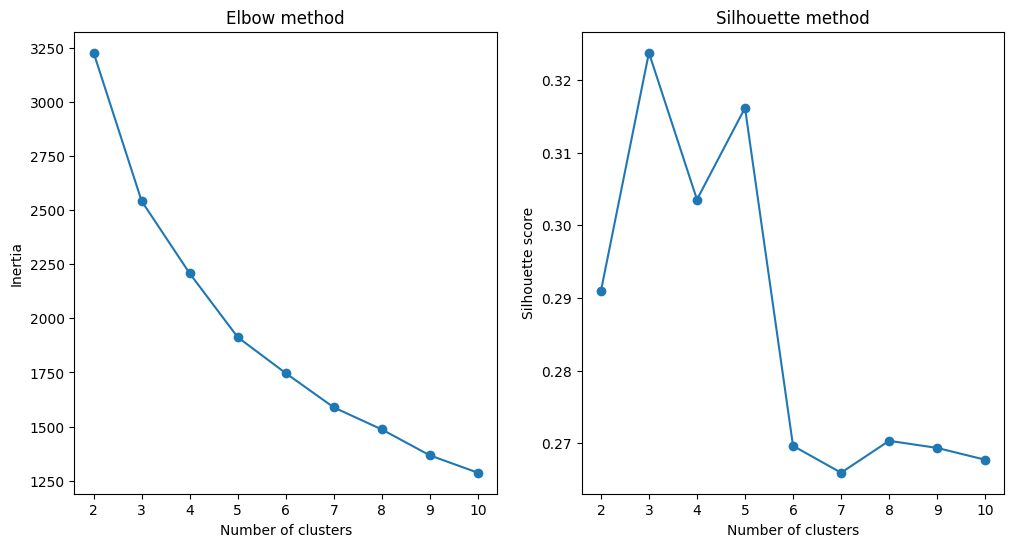

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(range(2, 11), inertias, marker='o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow method')

ax[1].plot(range(2, 11), scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score')
ax[1].set_title('Silhouette method')
plt.show()

# Visulalizing the Clusters for Training Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


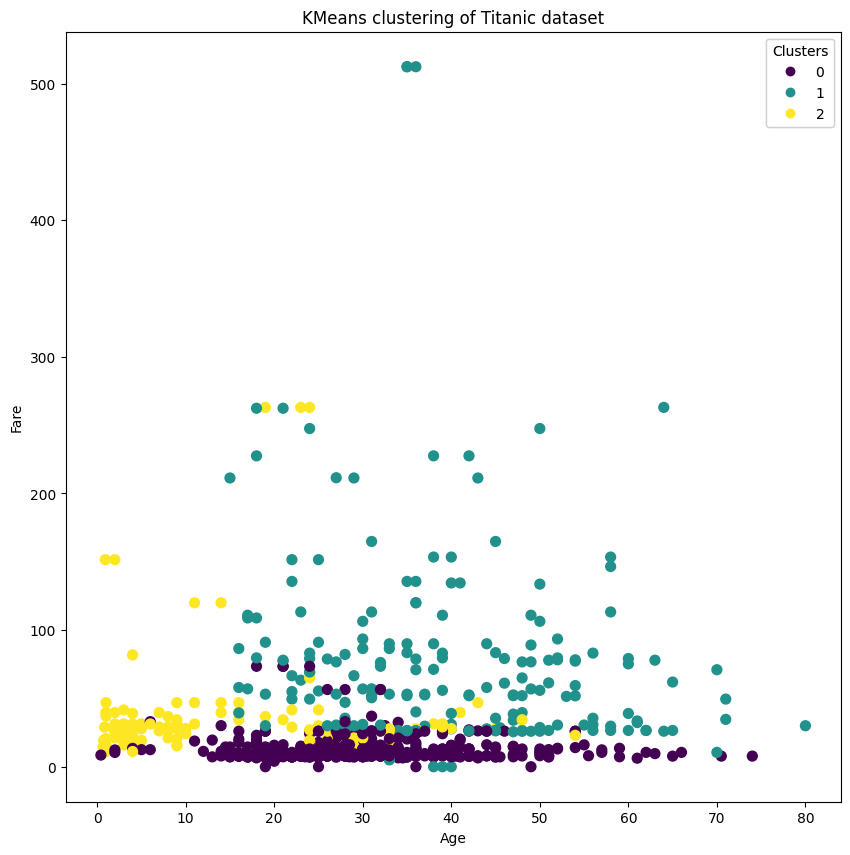

In [ ]:
pipeline.set_params(kmeans__n_clusters=3)
pipeline.fit(train_df)
clusters = pipeline.predict(train_df)
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(train_df['Age'], train_df['Fare'], c=clusters, s=50)
legend = ax.legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
ax.add_artist(legend)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('KMeans clustering of Titanic dataset')
plt.show()

# Visualizing the Clusters for Testing Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


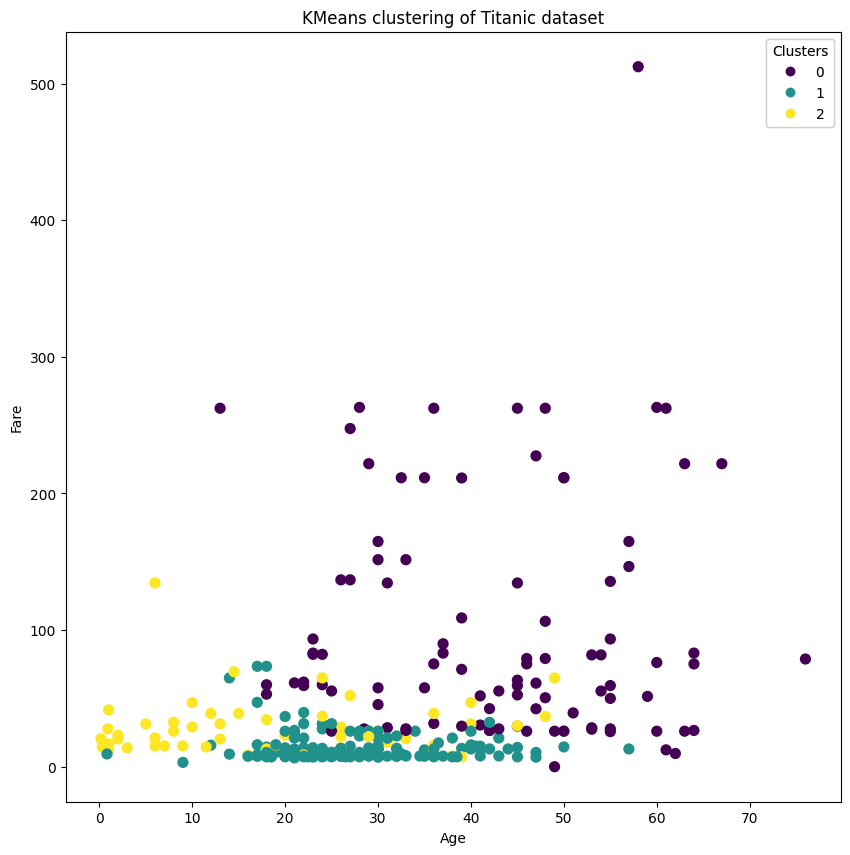

In [ ]:
pipeline.set_params(kmeans__n_clusters=3)
pipeline.fit(test_df)
clusters = pipeline.predict(test_df)
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(test_df['Age'], test_df['Fare'], c=clusters, s=50)
legend = ax.legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
ax.add_artist(legend)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('KMeans clustering of Titanic dataset')
plt.show()